# Exploratory Data Analysis (Group) on ACLR dataset

### Plan outlook:
Our current plan is to create a dynamic dashboard, in which the user (let it be a physician, surgeon, or a doctor) could select a group of data based on demographic variables, and then enter their current patient's stats/data to compare their patient's recovery status with the average/median recovery progress of **all the patients ** in that particular selected demographic group.

### Example Scenario:
If a doctor conducted a self-reported evaluation survey with their patient (i.e. KOOS), or any other form of strength evaluation based off a certain testing methodology. The doctor could enter that patient's survey results (or evaluation score) into the database, select the relevant demographic group that pertains to that particular patient, the dashboard would then compare the patient's score with the average/median score of all the patients in that demographic group. The dashboard would also provide a visual representation of the data, such as a bar graph or line chart, to help the doctor understand how their patient is doing compared to others in the same demographic group. This could help the doctor make more informed decisions about the patient's treatment plan and recovery process.

In [4]:
!pip install -q pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('aclr.csv')
df.head()

,record_id,redcap_event_name,redcap_repeat_instrument,sex_dashboard,graft_dashboard2,med_meniscus,lat_meniscus,lat_stab,physis,visit_sex,...,lsi_flex_mvic_60,acl_ext_isok_60,con_ext_isok_60,lsi_ext_isok_60,acl_flex_isok_60,con_flex_isok_60,lsi_flex_isok_60,strength_testing_complete,rts,rts_tss
0,1,baseline_arm_1,NaN,Male,Other,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,visit_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,...,NaN,2.57,2.92,87.86,1.50,1.45,103.32,2.0,NaN,NaN
2,1,long_term_outcomes_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,70.0
3,2,baseline_arm_1,NaN,Female,HS autograft,1.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,visit_1_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,...,NaN,0.97,2.16,45.00,0.88,1.20,72.98,2.0,NaN,NaN


## DATA CLEANING

Removing unnecessary columns (columns with zero data) 

In [6]:
df.columns[df.isnull().all()]# these are columns that have no data ( we need to drop)

Index(['redcap_repeat_instrument', 'tss_tegner'], dtype='object')

In [7]:
df.drop(columns=['redcap_repeat_instrument', 'tss_tegner'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11150 entries, 0 to 11149
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   record_id                  11150 non-null  int64  
 1   redcap_event_name          11150 non-null  object 
 2   sex_dashboard              4737 non-null   object 
 3   graft_dashboard2           4737 non-null   object 
 4   med_meniscus               4121 non-null   float64
 5   lat_meniscus               4121 non-null   float64
 6   lat_stab                   3662 non-null   float64
 7   physis                     936 non-null    float64
 8   visit_sex                  5234 non-null   object 
 9   visit_graft                5234 non-null   object 
 10  age                        5126 non-null   float64
 11  age_group                  5126 non-null   float64
 12  age_group_dashboard        4724 non-null   float64
 13  age_group_dashboard_use    5237 non-null   obj

Looking for missing values in the rest of the columns

In [9]:
df.isnull().sum() # looking for missing data

record_id                        0
redcap_event_name                0
sex_dashboard                 6413
graft_dashboard2              6413
med_meniscus                  7029
                             ...  
con_flex_isok_60              9402
lsi_flex_isok_60              8928
strength_testing_complete     5913
rts                          10464
rts_tss                      10479
Length: 61, dtype: int64

Finding the top few columns that have the least percentage of missing values, this shows that there exists a huge volume of missing values in the dataset and that imputation is very necessary in order to make any meaningful insight out of this dataset

In [10]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent.nsmallest(10))

record_id                     0.000000
redcap_event_name             0.000000
age_group_dashboard_use      53.031390
tss_dashboard                53.031390
strength_testing_complete    53.031390
visit_sex                    53.058296
visit_graft                  53.058296
reinjury                     53.587444
age                          54.026906
age_group                    54.026906
dtype: float64


# Seeing values to make the nan as Not reported

Before carrying out imputation for the missing values, replace all 'NaN' entries in the various demographic variables as Not reported for consistency 

In [11]:
print(df["sex_dashboard"].unique())
print(df['visit_sex'].unique())
print(df['age_group_dashboard_use'].unique())
print(df['graft_dashboard2'].unique())
print(df['visit_graft'].unique())

['Male' nan 'Female' 'Not Reported']
[nan 'Male' 'Female' 'Not Reported']
[nan '21 to 25 years' '12 to 14 years' '15 to 17 years' '18 to 20 years'
 '26 to 34 years' 'Not Reported']
['Other' nan 'HS autograft' 'BTB autograft' 'Allograft' 'QT autograft']
[nan 'Other' 'HS autograft' 'BTB autograft' 'Allograft' 'QT autograft']


In [12]:
print(df['redcap_event_name'].unique())

['baseline_arm_1' 'visit_1_arm_1' 'long_term_outcomes_arm_1'
 'visit_2_arm_1' 'visit_3_arm_1' 'visit_4_arm_1' 'visit_5_arm_1'
 'visit_6_arm_1' 'data_upload_arm_2' 'visit_7_arm_1' 'visit_8_arm_1'
 'visit_9_arm_1']


In [13]:
print(df['strength_testing_complete'].unique())

[nan  2.  0.]


In [14]:
print(df['med_meniscus'].unique())
print(df['lat_meniscus'].unique())

[nan  1.  3.  2.]
[nan  3.  1.  2.]


1. Gender, Age Groups,  ( make the nan as Not reported) ( input)

In [15]:
df['age_group_dashboard_use'] = df['age_group_dashboard_use'].fillna('Not Reported')
df['sex_dashboard'] = df['sex_dashboard'].fillna('Not Reported')
df['visit_sex'] = df['visit_sex'].fillna('Not Reported')

Visualizing and observing the presence of missing values across all columns and taking a look at what columns are useful, and what columns are meaningless

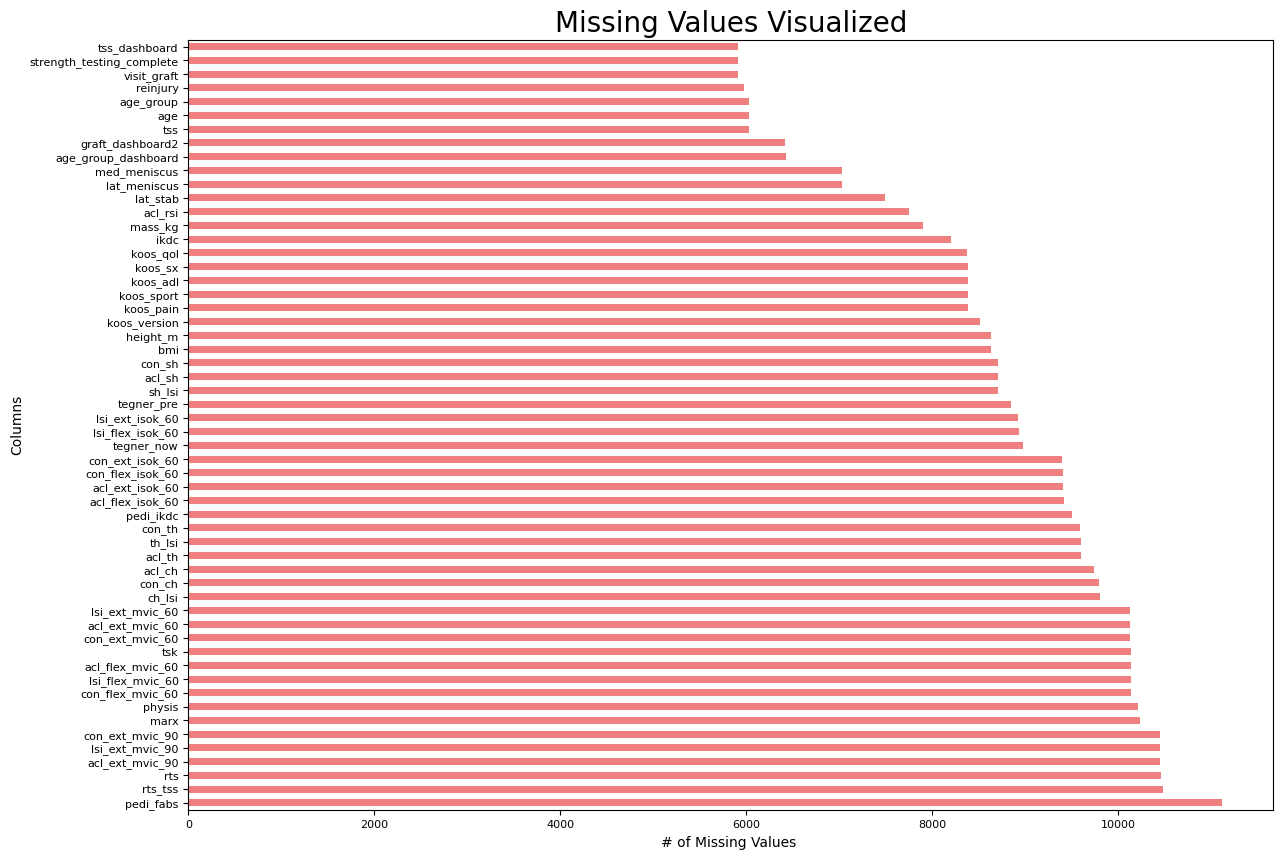

In [16]:
# I've also included a visual aid of how many missing values we have for each variable
# Bar plot of missing values for each column
missing_vals = df.isnull().sum()
missing_vals = missing_vals[missing_vals > 0] # making sure to inlcude only the missing values ( no variables with complete)
missing_vals.sort_values(inplace=True)

plt.figure(figsize=(14, 10))
missing_vals.plot(kind='barh', color='lightcoral') # making this horizontal bargraph to enhance readability
plt.title('Missing Values Visualized', fontsize=20)# let's make sure the title is big
plt.xlabel('# of Missing Values ', fontsize=10)
plt.ylabel('Columns', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis() # we need this code to ensure that we have the missing values inverted
plt.show()

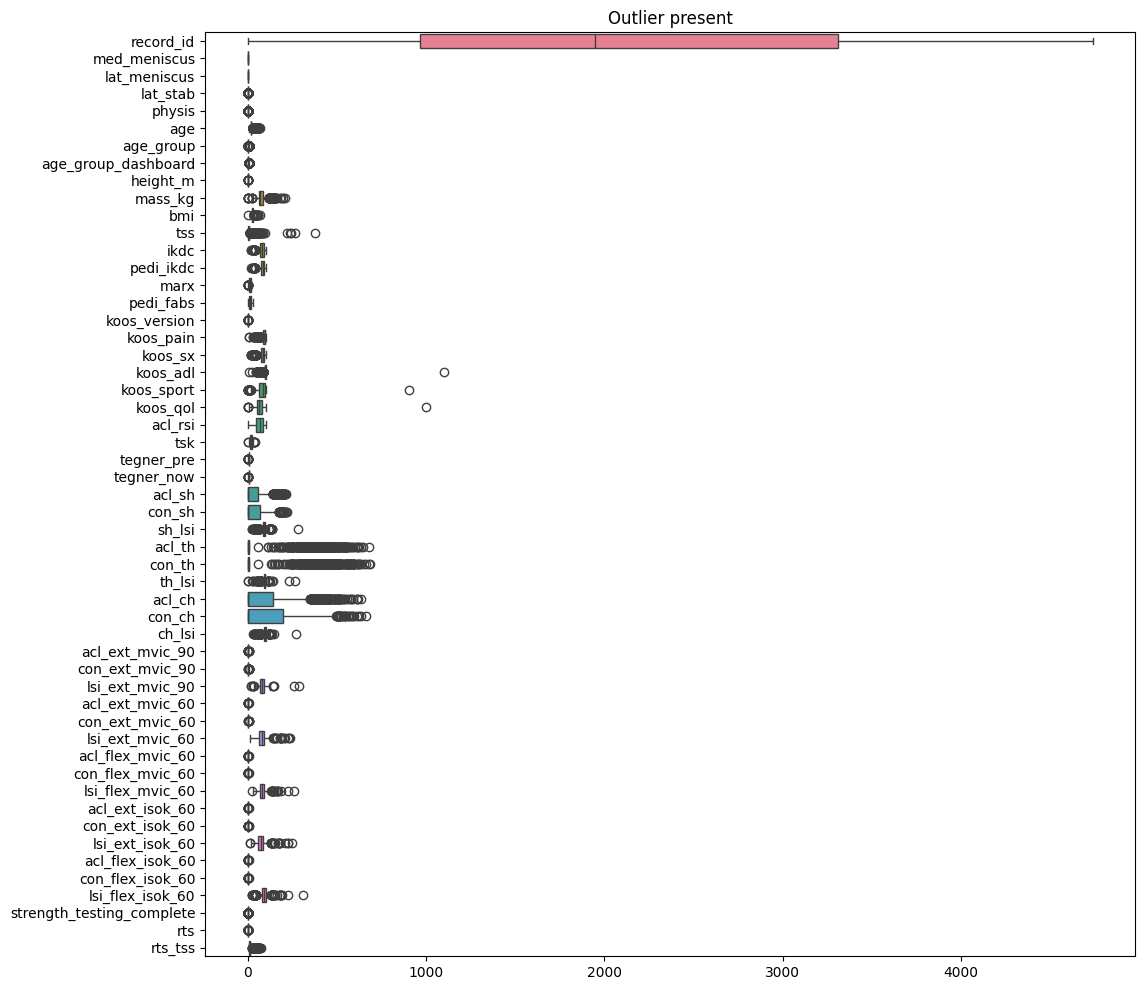

In [17]:
# This leads us to see the distribution of the data and see outliers present ( use boxplot since they do a good job detecting/visualizing outliers)
plt.figure(figsize=(12, 12))
sns.boxplot(data=df, orient="h")
plt.title("Outlier present")
plt.show()

Exploratory phase: to impute data more effectively, we chose to split the imputation process by categorical and numerical variables. We chose to impute the categorical variables via the frequency of a cateogory's presence in the dataset, and impute the numerical variables via the mean of the column's numerical values.

In [18]:
# Let's split the categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns # this includes strings
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns # these are numbers with meaning

# Now let's impute categorical(mode) and numerical columns (median)
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [19]:
df.isnull().sum()

record_id                    0
redcap_event_name            0
sex_dashboard                0
graft_dashboard2             0
med_meniscus                 0
                            ..
con_flex_isok_60             0
lsi_flex_isok_60             0
strength_testing_complete    0
rts                          0
rts_tss                      0
Length: 61, dtype: int64

Visualizing the distribution of graft types by age groups: are graft types a significant factor / choice among a certain age group?

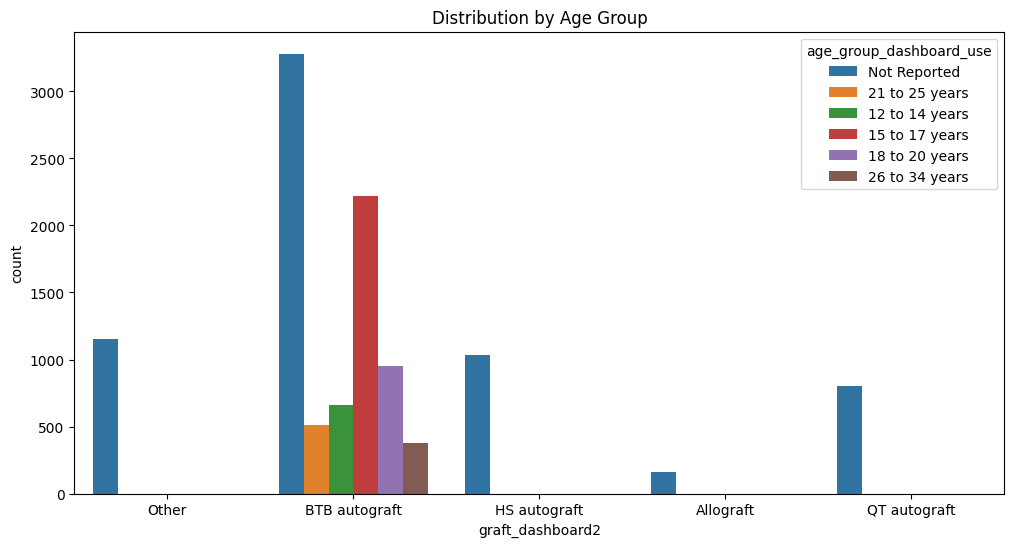

In [20]:
# distribtion of grafttype by age groups

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='graft_dashboard2', hue='age_group_dashboard_use')
plt.title("Distribution by Age Group")
plt.show()

Visualizing the distribution of age groups by sex category: this graph tells us that that the age group of 15-17 years old showcases a little disparity while all other age groups contain a similar number of male and female patients. An initial conclusion could be made that girls are likely to be injured from the age of 15 to 17 years old.

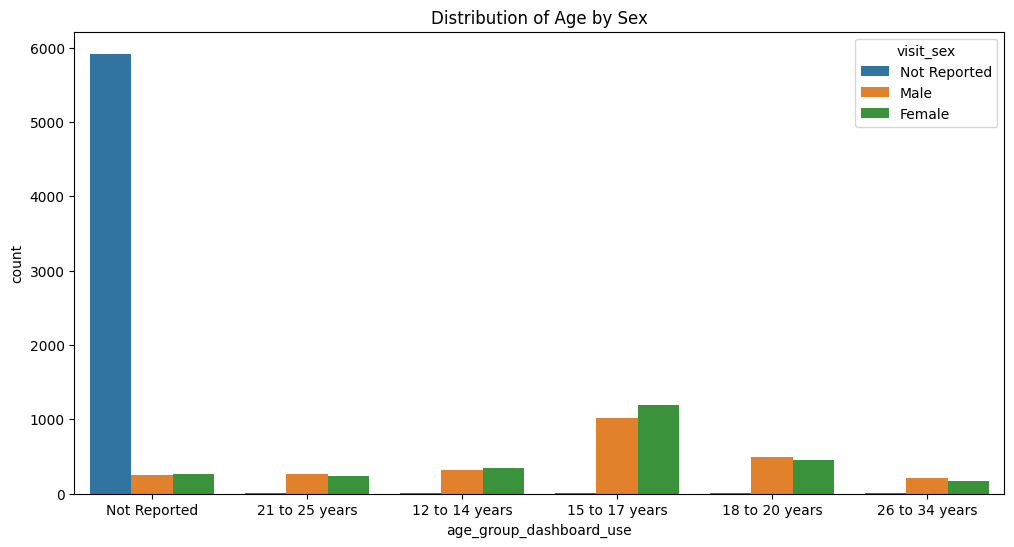

In [21]:
# distrubtion of grafttype by sex
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_group_dashboard_use', hue='visit_sex')
plt.title("Distribution of Age by Sex")
plt.show()

We discovered that tss stands for 'time since surgery' a relatively useful variable for us since we are aiming to visualize the change in recovery rates or other variables over time.

In [22]:
print(df['tss_dashboard'].unique()) # time since surgery

['5 to 7 months' '13 to 24 months' '8 to 12 months' '3 to 4 months'
 'Not Reported' 'Preoperative']


Visualizing how the self-reported pain evaluation score is distributed by the variable of time since surgery. If the KOOS pain score is distributed from 0 to 100, with 100 representing maximum 'pain level', we could conclude that most people felt maximum painfulness at the 8th to 12th month since surgery. This proves that that tss, combined with any other recovery metrics, could deduce valuable and interesting insights for not just us, but also our 'stakeholders' - the doctors/physicians when observing the recovery of their patients.

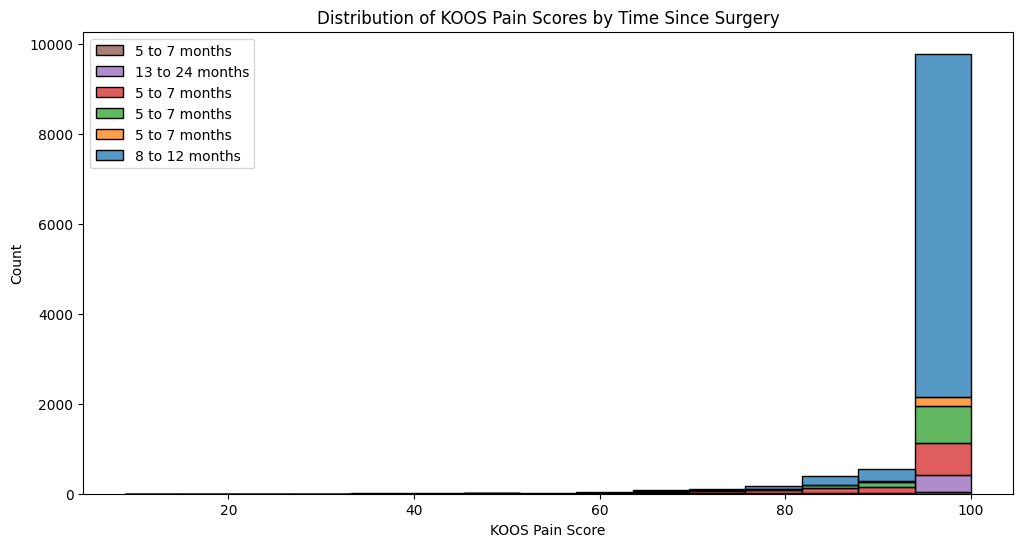

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='koos_pain', hue='tss_dashboard', multiple='stack')  # or 'dodge'
plt.title("Distribution of KOOS Pain Scores by Time Since Surgery")
plt.xlabel("KOOS Pain Score")
plt.ylabel("Count")
plt.legend(df['tss_dashboard'])
plt.show()


With this in mind, we've decided to visualize tss against all of the other recovery metric variables (whether it is pain, LSI, strength score, etc) to see how patients recover over time. We adopted a small multiples strategy so that all of the visualizations can be created at once

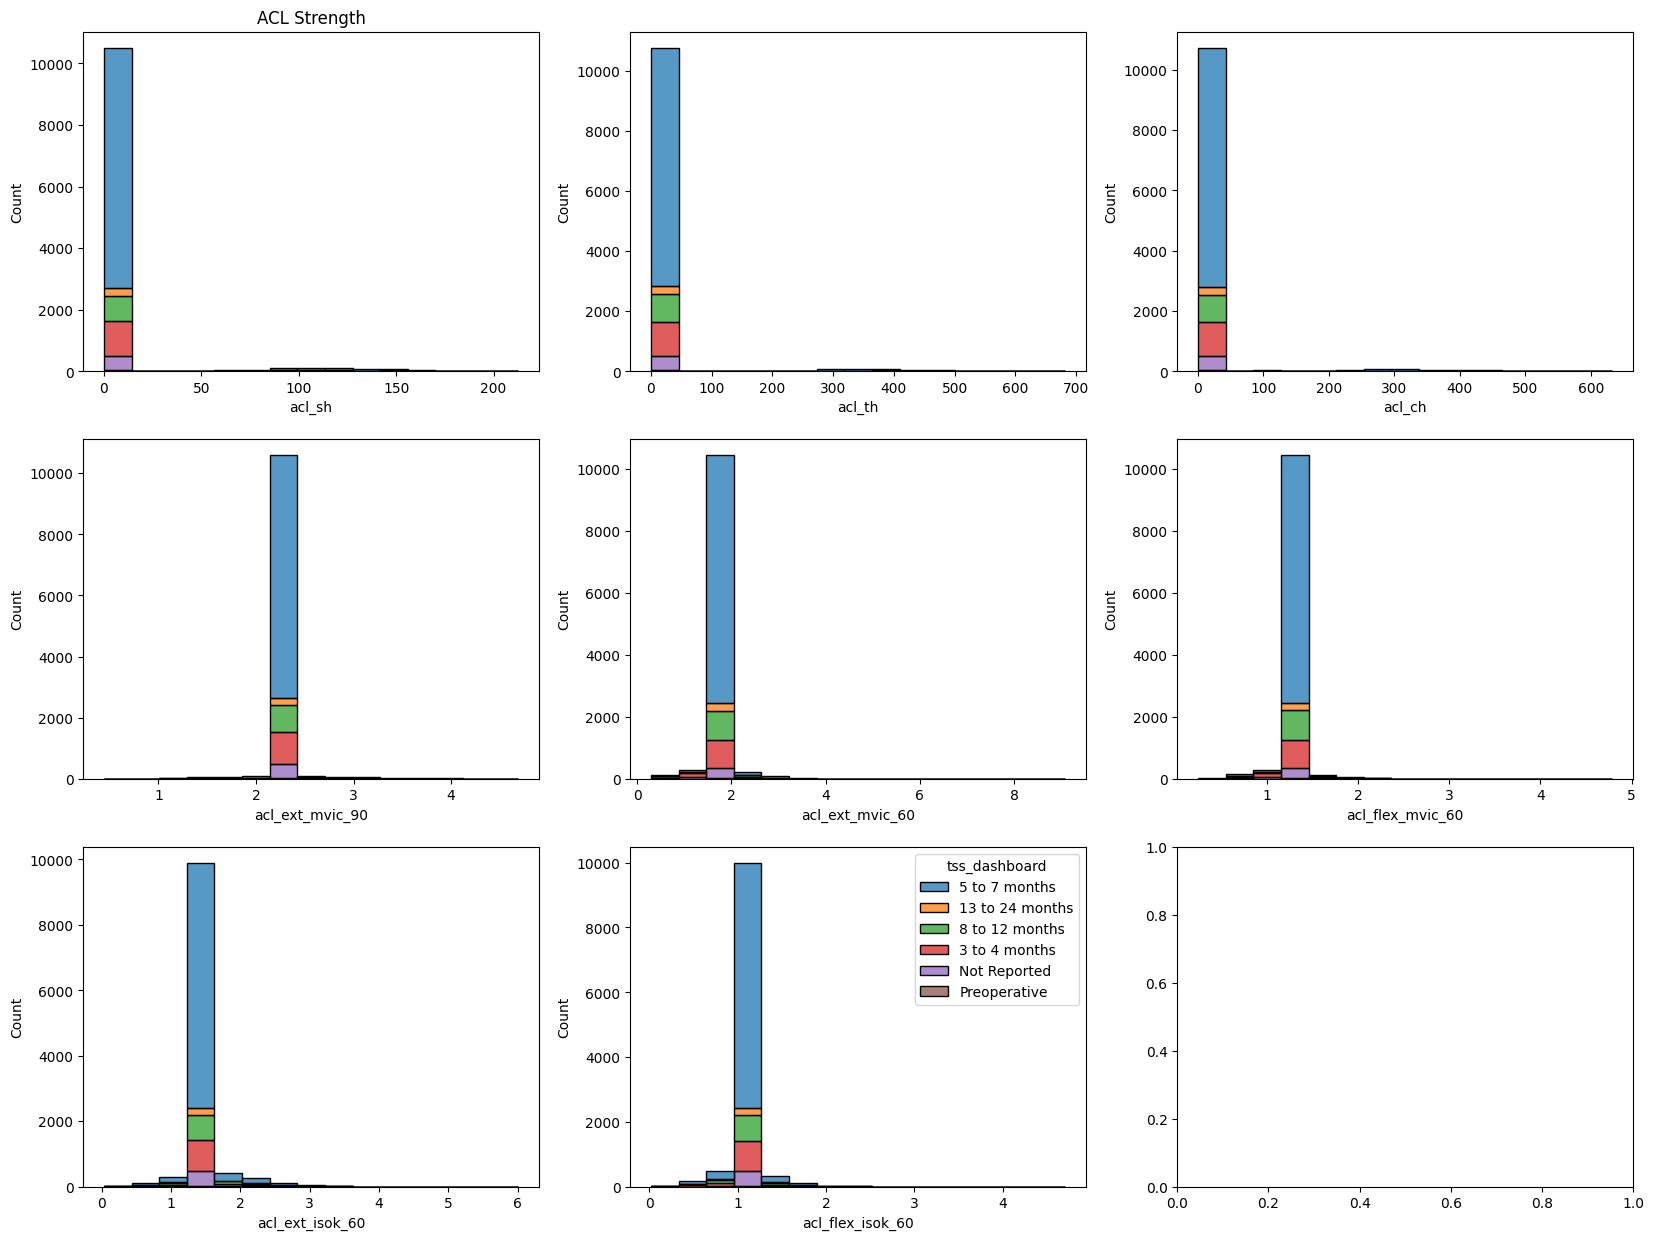

In [24]:
# visualizing the distirbution of strength testing, tss ( multiple)

fig,axs = plt.subplots(3,3, figsize=(20, 15))

sns.histplot(data=df, x='acl_sh', hue= 'tss_dashboard', multiple='stack', ax=axs[0,0], legend=False)
axs[0,0].set_title("ACL Strength")

sns.histplot(data=df, x='acl_th', hue= 'tss_dashboard', multiple='stack', ax=axs[0,1], legend=False)

sns.histplot(data=df, x='acl_ch', hue= 'tss_dashboard', multiple='stack', ax=axs[0,2], legend=False)

sns.histplot(data=df, x='acl_ext_mvic_90', hue= 'tss_dashboard', multiple='stack', ax=axs[1,0], legend=False)

sns.histplot(data=df, x='acl_ext_mvic_60', hue= 'tss_dashboard', multiple='stack', ax=axs[1,1], legend=False)

sns.histplot(data=df, x='acl_flex_mvic_60', hue= 'tss_dashboard', multiple='stack', ax=axs[1,2], legend=False)

sns.histplot(data=df, x='acl_ext_isok_60', hue= 'tss_dashboard', multiple='stack', ax=axs[2,0], legend=False)

sns.histplot(data=df, x='acl_flex_isok_60', hue= 'tss_dashboard', multiple='stack', ax=axs[2,1])

plt.show()

From the small multiples above, we could see how the recovery metrics are distributed by comparing the different 'types' of recovery metrics in the same 'category'. I.e. observing how acl knee extension value differentiates in the different degrees of which the patient can extend their knee to. 